In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
from collections import Counter


In [3]:
#wos_retracted_papers = pd.read_excel('./papers_abt_retractions/wos_search_retracted_paper_kw.xls')
#wos_retracted_publications = pd.read_excel('./papers_abt_retractions/wos_search_retracted_publication_kw.xls')
#wos_retracted_papers2 = pd.read_excel('./papers_abt_retractions/wos_search_retracted_paper_kw2.xls')
#wos_search = pd.concat([wos_retracted_papers, wos_retracted_papers2, wos_retracted_publications])
wos_search = pd.read_excel('./papers_abt_retractions/abt_retractions.xlsx')

In [4]:
wos_search.head()

,Unnamed: 0.1,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,...,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record,Unnamed: 0
0,1,J,"da Silva, JAT; Dobranszki, J",NaN,NaN,NaN,"da Silva, Jaime A. Teixeira; Dobranszki, Judit",NaN,NaN,Highly cited retracted papers,...,Computer Science; Information Science & Librar...,EL0VI,NaN,NaN,NaN,NaN,2023-09-24,WOS:000394339500030,0.0,NaN
1,2,J,"Candal-Pedreira, C; Ross, JS; Ruano-Ravina, A;...",NaN,NaN,NaN,"Candal-Pedreira, Cristina; Ross, Joseph S.; Ru...",NaN,NaN,Retracted papers originating from paper mills:...,...,General & Internal Medicine,6T3GK,36442874.0,"Green Published, hybrid",NaN,NaN,2023-09-24,WOS:000893566800005,0.0,NaN
2,3,J,"Peng, H; Romero, DM; Horvat, EA",NaN,NaN,NaN,"Peng, Hao; Romero, Daniel M.; Horvat, Emoke-Agnes",NaN,NaN,Dynamics of cross-platform attention to retrac...,...,Science & Technology - Other Topics,3R1VC,35700358.0,"Green Submitted, hybrid, Green Published",NaN,NaN,2023-09-24,WOS:000838706700008,0.0,NaN
3,5,J,"Bulow, W; Godskesen, TE; Helgesson, G; Eriksso...",NaN,NaN,NaN,"Bulow, William; Godskesen, Tove E.; Helgesson,...",NaN,NaN,Why unethical papers should be retracted,...,Social Sciences - Other Topics; Medical Ethics...,XJ7MF,32792346.0,NaN,NaN,NaN,2023-09-24,WOS:000726966400031,0.0,NaN
4,6,J,"Aspura, MKYI; Noorhidawati, A; Abrizah, A",NaN,NaN,NaN,"Aspura, M. K. Yanti Idaya; Noorhidawati, A.; A...",NaN,NaN,An analysis of Malaysian retracted papers: Mis...,...,Computer Science; Information Science & Librar...,GL6BT,NaN,NaN,NaN,NaN,2023-09-24,WOS:000437262800011,0.0,NaN


In [5]:
wos_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 74 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0.1                1918 non-null   int64  
 1   Publication Type            1918 non-null   object 
 2   Authors                     1918 non-null   object 
 3   Book Authors                0 non-null      float64
 4   Book Editors                1 non-null      object 
 5   Book Group Authors          0 non-null      float64
 6   Author Full Names           1918 non-null   object 
 7   Book Author Full Names      0 non-null      float64
 8   Group Authors               5 non-null      object 
 9   Article Title               1918 non-null   object 
 10  Source Title                1918 non-null   object 
 11  Book Series Title           1 non-null      object 
 12  Book Series Subtitle        0 non-null      float64
 13  Language                    1918 

In [6]:
wos_search.drop_duplicates()

,Unnamed: 0.1,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,...,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record,Unnamed: 0
0,1,J,"da Silva, JAT; Dobranszki, J",NaN,NaN,NaN,"da Silva, Jaime A. Teixeira; Dobranszki, Judit",NaN,NaN,Highly cited retracted papers,...,Computer Science; Information Science & Librar...,EL0VI,NaN,NaN,NaN,NaN,2023-09-24,WOS:000394339500030,0.0,NaN
1,2,J,"Candal-Pedreira, C; Ross, JS; Ruano-Ravina, A;...",NaN,NaN,NaN,"Candal-Pedreira, Cristina; Ross, Joseph S.; Ru...",NaN,NaN,Retracted papers originating from paper mills:...,...,General & Internal Medicine,6T3GK,36442874.0,"Green Published, hybrid",NaN,NaN,2023-09-24,WOS:000893566800005,0.0,NaN
2,3,J,"Peng, H; Romero, DM; Horvat, EA",NaN,NaN,NaN,"Peng, Hao; Romero, Daniel M.; Horvat, Emoke-Agnes",NaN,NaN,Dynamics of cross-platform attention to retrac...,...,Science & Technology - Other Topics,3R1VC,35700358.0,"Green Submitted, hybrid, Green Published",NaN,NaN,2023-09-24,WOS:000838706700008,0.0,NaN
3,5,J,"Bulow, W; Godskesen, TE; Helgesson, G; Eriksso...",NaN,NaN,NaN,"Bulow, William; Godskesen, Tove E.; Helgesson,...",NaN,NaN,Why unethical papers should be retracted,...,Social Sciences - Other Topics; Medical Ethics...,XJ7MF,32792346.0,NaN,NaN,NaN,2023-09-24,WOS:000726966400031,0.0,NaN
4,6,J,"Aspura, MKYI; Noorhidawati, A; Abrizah, A",NaN,NaN,NaN,"Aspura, M. K. Yanti Idaya; Noorhidawati, A.; A...",NaN,NaN,An analysis of Malaysian retracted papers: Mis...,...,Computer Science; Information Science & Librar...,GL6BT,NaN,NaN,NaN,NaN,2023-09-24,WOS:000437262800011,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,15172,J,"Platt, M",NaN,NaN,NaN,"Platt, Maria",NaN,NaN,"Migration, Moralities and Moratoriums: Female ...",...,Area Studies; Cultural Studies; Asian Studies,FW5MC,NaN,NaN,NaN,NaN,2023-09-24,WOS:000425360500006,NaN,NaN
1914,15182,J,"Li, SY; Myerson, MS",NaN,NaN,NaN,"Li, Shuyuan; Myerson, Mark S.",NaN,NaN,EXCISION OF A MIDDLE FACET TARSAL COALITION,...,Surgery,NM7LG,32368410.0,Green Published,NaN,NaN,2023-09-24,WOS:000568275400008,NaN,NaN
1915,15183,J,"Jaffray, DA; Drake, DG; Moreau, M; Martinez, A...",NaN,NaN,NaN,"Jaffray, DA; Drake, DG; Moreau, M; Martinez, A...",NaN,NaN,A radiographic and tomographic imaging system ...,...,"Oncology; Radiology, Nuclear Medicine & Medica...",243EA,10524434.0,NaN,NaN,NaN,2023-09-24,WOS:000082983000035,NaN,NaN
1916,15188,J,"Skofic, J",NaN,NaN,NaN,"Skofic, Jozica",NaN,NaN,"ZILJSKO (GAILTAL) DIALECT AT RATECE, UPPER CAR...",...,Arts & Humanities - Other Topics,JC5EO,NaN,NaN,NaN,NaN,2023-09-24,WOS:000489303300003,NaN,NaN


In [8]:
#Load your DataFrame and preprocess the abstracts:

# Assuming your DataFrame has a column named 'abstract'
abstracts = wos_search['Abstract'].tolist()

# Preprocess abstracts by tokenizing and removing stopwords
stop_words = set(stopwords.words('english'))
abstracts_tokens = [nltk.word_tokenize(str(abstract).lower()) for abstract in abstracts]
abstracts_tokens = [[word for word in tokens if word.isalnum() and word not in stop_words] for tokens in abstracts_tokens]


In [9]:
#Generate bi-grams from the preprocessed abstracts:
abstracts_bigrams = [list(bigrams(tokens)) for tokens in abstracts_tokens]


In [10]:
#Count the frequency of each bi-gram:
all_bigrams = [bigram for abstract_bigrams in abstracts_bigrams for bigram in abstract_bigrams]
bigram_counts = Counter(all_bigrams)


In [11]:
#Get the most common bi-grams:
n_most_common = 20  # You can change this number to get more or fewer bi-grams
most_common_bigrams = bigram_counts.most_common(n_most_common)

least_common_bigrams = bigram_counts.most_common()[:-n_most_common-1:-1]

In [12]:
#Print or use the most common bi-grams:
for bigram, count in most_common_bigrams:
    print(' '.join(bigram), ':', count)


rights reserved : 255
retracted articles : 217
elsevier rights : 200
retracted papers : 116
retracted publications : 99
retraction notices : 64
articles retracted : 63
paper presents : 57
scientific misconduct : 56
breast cancer : 56
present study : 54
et al : 54
cancer cells : 53
results show : 52
reasons retraction : 52
cell lines : 50
results suggest : 49
published elsevier : 48
papers retracted : 47
gene expression : 47


In [13]:
for bigram, count in least_common_bigrams:
    print(' '.join(bigram), ':', count)

borders managements : 1
policies borders : 1
effective policies : 1
efficient effective : 1
implement efficient : 1
makers implement : 1
policy makers : 1
research policy : 1
extract research : 1
recommendations extract : 1
political recommendations : 1
conclusions political : 1
consists conclusions : 1
section consists : 1
studies last : 1
similarities case : 1
differences similarities : 1
compare differences : 1
guayana finally : 1
esebequio territorial : 1


In [14]:
wos_search['Document Type'].value_counts()

Document Type
Article    1918
Name: count, dtype: int64

In [15]:
filtered = wos_search[wos_search['Document Type'].str.contains('Retracted Publication')]
filtered['Article Title']


Series([], Name: Article Title, dtype: object)

In [16]:
filtered[~filtered['Article Title'].str.contains('RETRACTED:')]


,Unnamed: 0.1,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,...,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record,Unnamed: 0


In [17]:
wos_search = wos_search[~wos_search['Document Type'].str.contains('Retracted Publication')]
wos_search = wos_search[~wos_search['Document Type'].str.contains('Retraction')]

In [18]:
wos_search

,Unnamed: 0.1,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,...,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record,Unnamed: 0
0,1,J,"da Silva, JAT; Dobranszki, J",NaN,NaN,NaN,"da Silva, Jaime A. Teixeira; Dobranszki, Judit",NaN,NaN,Highly cited retracted papers,...,Computer Science; Information Science & Librar...,EL0VI,NaN,NaN,NaN,NaN,2023-09-24,WOS:000394339500030,0.0,NaN
1,2,J,"Candal-Pedreira, C; Ross, JS; Ruano-Ravina, A;...",NaN,NaN,NaN,"Candal-Pedreira, Cristina; Ross, Joseph S.; Ru...",NaN,NaN,Retracted papers originating from paper mills:...,...,General & Internal Medicine,6T3GK,36442874.0,"Green Published, hybrid",NaN,NaN,2023-09-24,WOS:000893566800005,0.0,NaN
2,3,J,"Peng, H; Romero, DM; Horvat, EA",NaN,NaN,NaN,"Peng, Hao; Romero, Daniel M.; Horvat, Emoke-Agnes",NaN,NaN,Dynamics of cross-platform attention to retrac...,...,Science & Technology - Other Topics,3R1VC,35700358.0,"Green Submitted, hybrid, Green Published",NaN,NaN,2023-09-24,WOS:000838706700008,0.0,NaN
3,5,J,"Bulow, W; Godskesen, TE; Helgesson, G; Eriksso...",NaN,NaN,NaN,"Bulow, William; Godskesen, Tove E.; Helgesson,...",NaN,NaN,Why unethical papers should be retracted,...,Social Sciences - Other Topics; Medical Ethics...,XJ7MF,32792346.0,NaN,NaN,NaN,2023-09-24,WOS:000726966400031,0.0,NaN
4,6,J,"Aspura, MKYI; Noorhidawati, A; Abrizah, A",NaN,NaN,NaN,"Aspura, M. K. Yanti Idaya; Noorhidawati, A.; A...",NaN,NaN,An analysis of Malaysian retracted papers: Mis...,...,Computer Science; Information Science & Librar...,GL6BT,NaN,NaN,NaN,NaN,2023-09-24,WOS:000437262800011,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,15172,J,"Platt, M",NaN,NaN,NaN,"Platt, Maria",NaN,NaN,"Migration, Moralities and Moratoriums: Female ...",...,Area Studies; Cultural Studies; Asian Studies,FW5MC,NaN,NaN,NaN,NaN,2023-09-24,WOS:000425360500006,NaN,NaN
1914,15182,J,"Li, SY; Myerson, MS",NaN,NaN,NaN,"Li, Shuyuan; Myerson, Mark S.",NaN,NaN,EXCISION OF A MIDDLE FACET TARSAL COALITION,...,Surgery,NM7LG,32368410.0,Green Published,NaN,NaN,2023-09-24,WOS:000568275400008,NaN,NaN
1915,15183,J,"Jaffray, DA; Drake, DG; Moreau, M; Martinez, A...",NaN,NaN,NaN,"Jaffray, DA; Drake, DG; Moreau, M; Martinez, A...",NaN,NaN,A radiographic and tomographic imaging system ...,...,"Oncology; Radiology, Nuclear Medicine & Medica...",243EA,10524434.0,NaN,NaN,NaN,2023-09-24,WOS:000082983000035,NaN,NaN
1916,15188,J,"Skofic, J",NaN,NaN,NaN,"Skofic, Jozica",NaN,NaN,"ZILJSKO (GAILTAL) DIALECT AT RATECE, UPPER CAR...",...,Arts & Humanities - Other Topics,JC5EO,NaN,NaN,NaN,NaN,2023-09-24,WOS:000489303300003,NaN,NaN


In [19]:
wos_search[wos_search['Document Type']=='Retraction']

,Unnamed: 0.1,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,...,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record,Unnamed: 0


In [20]:
wos_search[wos_search['Article Title'].str.contains('RETRACTED:')]

,Unnamed: 0.1,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,...,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record,Unnamed: 0
1177,1979,J,"Tran, TA",NaN,NaN,NaN,Tien Anh Tran,NaN,NaN,RETRACTED: Optimization of the energy efficien...,...,Engineering,UT8KC,NaN,NaN,NaN,NaN,2023-09-24,WOS:000698358200002,NaN,NaN


In [21]:
year_counts = wos_search['Publication Year'].value_counts().sort_index() #[wos_search['Publication Year'] >=1900]


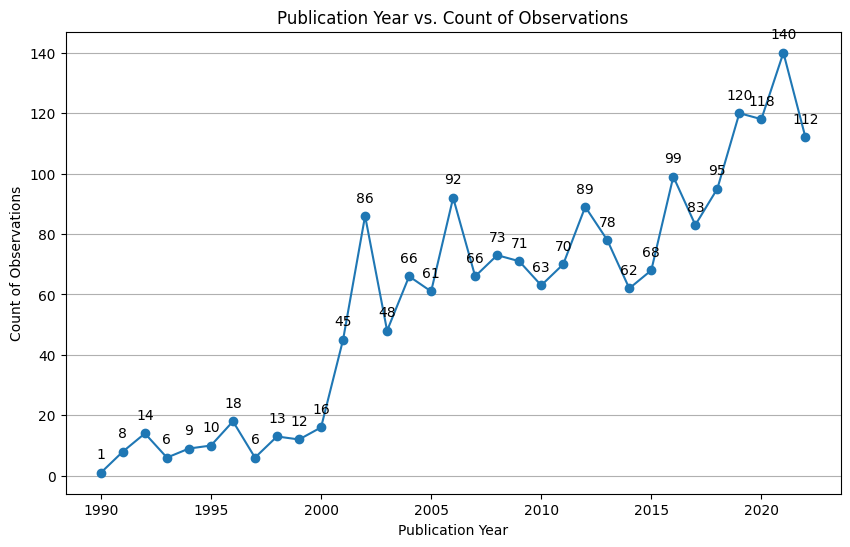

In [22]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(year_counts.index, year_counts.values, marker='o')

# Annotate each data point with its count
for year, count in zip(year_counts.index, year_counts.values):
    plt.annotate(str(count), (year, count), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Publication Year')
plt.ylabel('Count of Observations')
plt.title('Publication Year vs. Count of Observations')
plt.grid(True, axis= 'y')
plt.show()


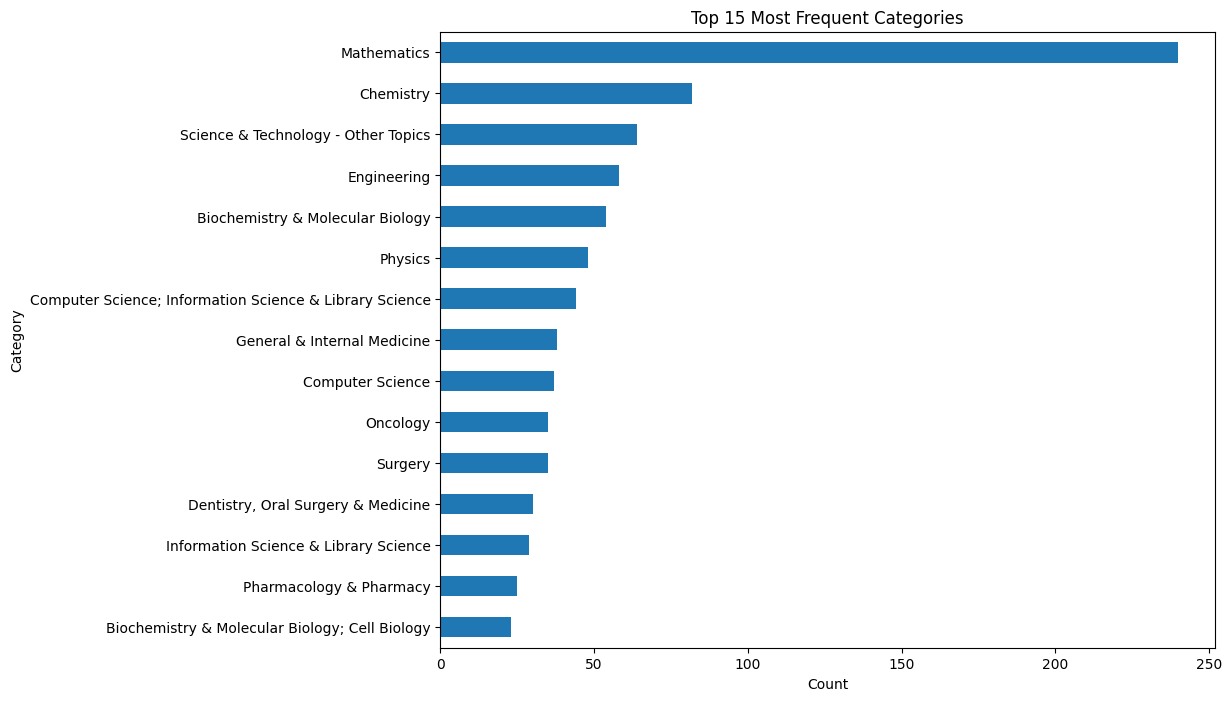

In [23]:
# Count the occurrences of each category
category_counts = wos_search['Research Areas'].value_counts().head(15)

# Create a bar chart
plt.figure(figsize=(10, 8))
category_counts.sort_values().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Top 15 Most Frequent Categories')
plt.show()

In [24]:
wos_search[wos_search['Research Areas'].str.contains('Computer Science', case=False, na=False)]['Article Title'][:40]

0                          Highly cited retracted papers
4      An analysis of Malaysian retracted papers: Mis...
6      Why do some retracted papers continue to be ci...
8      Retracted papers by Iranian authors: causes, j...
10     Can tweets be used to detect problems early wi...
15     Other than detecting impact in advance, altern...
17     Multiple versions of the h-index: cautionary u...
18     Team size and retracted citations reveal the p...
20                                Retractions in Science
33     An observation framework for retracted publica...
42     How do academia and society react to erroneous...
45     Post retraction citations in context: a case s...
52     Exploring perception of retraction based on me...
59     Silently withdrawn or retracted preprints rela...
67                    The intersection of retracts of A*
68     A Multidimensional Investigation of the Effect...
75     Collaboration and its influence on retraction ...
88     Retractions from altmetr

# Journals to consider

In [25]:
journals = pd.read_csv('../scimagojr_2022.csv', sep=';')
journals

,Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2022),Total Docs. (3years),...,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher,Coverage,Categories,Areas
0,1,28773,Ca-A Cancer Journal for Clinicians,journal,"15424863, 00079235","86,091",Q1,198,44,118,...,30318,85,"299,99","97,00",United States,Northern America,Wiley-Blackwell,1950-2022,Hematology (Q1); Oncology (Q1),Medicine
1,2,29431,Quarterly Journal of Economics,journal,"00335533, 15314650","36,730",Q1,292,36,122,...,2141,122,"14,83","66,61",United Kingdom,Western Europe,Oxford University Press,1886-2022,Economics and Econometrics (Q1),"Economics, Econometrics and Finance"
2,3,20315,Nature Reviews Molecular Cell Biology,journal,"14710072, 14710080","34,201",Q1,485,121,328,...,13331,156,"35,47","89,29",United Kingdom,Western Europe,Nature Publishing Group,2000-2022,Cell Biology (Q1); Molecular Biology (Q1),"Biochemistry, Genetics and Molecular Biology"
3,4,18434,Cell,journal,"00928674, 10974172","26,494",Q1,856,420,1637,...,67791,1440,"43,80","65,74",United States,Northern America,Cell Press,1974-2022,"Biochemistry, Genetics and Molecular Biology (...","Biochemistry, Genetics and Molecular Biology"
4,5,15847,New England Journal of Medicine,journal,"00284793, 15334406","26,015",Q1,1130,1410,4561,...,133956,1854,"33,93","10,21",United States,Northern America,Massachussetts Medical Society,1945-2022,Medicine (miscellaneous) (Q1),Medicine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18031,18032,17500154901,Progress in Molecular Biology and Translationa...,journal,"18771173, 18780814",NaN,-,110,90,314,...,1170,0,"2,72","108,88",Netherlands,Western Europe,Academic Press Inc.,2008-2022,Molecular Biology; Molecular Medicine,"Biochemistry, Genetics and Molecular Biology"
18032,18033,25192,Reviews of Environmental Contamination and Tox...,journal,01795953,NaN,-,94,22,99,...,441,0,"4,40","151,68",United States,Northern America,Springer New York,1987-2022,"Health, Toxicology and Mutagenesis; Medicine (...",Environmental Science; Medicine
18033,18034,5700155185,Voprosy Istorii (discontinued),journal,00428779,NaN,-,5,168,1316,...,38,1316,"0,03","7,96",Russian Federation,Eastern Europe,"Rossiiskaya Akademiya Nauk, Institut Istorii (...","1965, 1972, 1975, 1978-1982, 1985, 1988, 1999-...",History; Medicine (miscellaneous),Arts and Humanities; Medicine
18034,18035,21100873483,Wisdom (discontinued),journal,18293824,NaN,-,7,66,180,...,76,180,"0,45","25,61",Armenia,Eastern Europe,Khachatur Abovyan Armenian State Pedagogical U...,2018-2022,Philosophy,Arts and Humanities


In [26]:
# Calculate the threshold for the top 10%
threshold = int(0.10 * len(journals))

# Select the top 10% of rows
top_10_percent = journals.head(threshold)
top_10_percent

,Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2022),Total Docs. (3years),...,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher,Coverage,Categories,Areas
0,1,28773,Ca-A Cancer Journal for Clinicians,journal,"15424863, 00079235","86,091",Q1,198,44,118,...,30318,85,"299,99","97,00",United States,Northern America,Wiley-Blackwell,1950-2022,Hematology (Q1); Oncology (Q1),Medicine
1,2,29431,Quarterly Journal of Economics,journal,"00335533, 15314650","36,730",Q1,292,36,122,...,2141,122,"14,83","66,61",United Kingdom,Western Europe,Oxford University Press,1886-2022,Economics and Econometrics (Q1),"Economics, Econometrics and Finance"
2,3,20315,Nature Reviews Molecular Cell Biology,journal,"14710072, 14710080","34,201",Q1,485,121,328,...,13331,156,"35,47","89,29",United Kingdom,Western Europe,Nature Publishing Group,2000-2022,Cell Biology (Q1); Molecular Biology (Q1),"Biochemistry, Genetics and Molecular Biology"
3,4,18434,Cell,journal,"00928674, 10974172","26,494",Q1,856,420,1637,...,67791,1440,"43,80","65,74",United States,Northern America,Cell Press,1974-2022,"Biochemistry, Genetics and Molecular Biology (...","Biochemistry, Genetics and Molecular Biology"
4,5,15847,New England Journal of Medicine,journal,"00284793, 15334406","26,015",Q1,1130,1410,4561,...,133956,1854,"33,93","10,21",United States,Northern America,Massachussetts Medical Society,1945-2022,Medicine (miscellaneous) (Q1),Medicine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,1799,19900192175,Journal of Topology,journal,"17538416, 17538424","1,575",Q1,28,56,119,...,137,119,"1,11","36,68",United Kingdom,Western Europe,John Wiley and Sons Ltd,2010-2022,Geometry and Topology (Q1),Mathematics
1799,1800,21100875643,Materials Chemistry Frontiers,journal,20521537,"1,575",Q1,70,367,1245,...,8782,1233,"7,21","63,92",United Kingdom,Western Europe,Royal Society of Chemistry,2017-2022,Materials Chemistry (Q1); Materials Science (m...,Materials Science
1800,1801,15061,Agricultural Systems,journal,"0308521X, 18732267","1,574",Q1,126,166,607,...,4408,601,"7,02","72,49",United Kingdom,Western Europe,Elsevier BV,1976-2022,Agronomy and Crop Science (Q1); Animal Science...,Agricultural and Biological Sciences
1801,1802,26112,Frontiers of Hormone Research,journal,03013073,"1,574",Q1,42,0,45,...,156,41,"0,92","0,00",Switzerland,Western Europe,S. Karger AG,"1975, 1977, 1984, 1996-1997, 1999-2002, 2004-2...","Endocrinology (Q1); Endocrinology, Diabetes an...","Biochemistry, Genetics and Molecular Biology; ..."


In [27]:
top_10_percent['Issn']

0       15424863, 00079235
1       00335533, 15314650
2       14710072, 14710080
3       00928674, 10974172
4       00284793, 15334406
               ...        
1798    17538416, 17538424
1799              20521537
1800    0308521X, 18732267
1801              03013073
1802    14617307, 13505076
Name: Issn, Length: 1803, dtype: object

In [26]:
top_10_percent.columns

Index(['Rank', 'Sourceid', 'Title', 'Type', 'Issn', 'SJR', 'SJR Best Quartile',
       'H index', 'Total Docs. (2022)', 'Total Docs. (3years)', 'Total Refs.',
       'Total Cites (3years)', 'Citable Docs. (3years)',
       'Cites / Doc. (2years)', 'Ref. / Doc.', 'Country', 'Region',
       'Publisher', 'Coverage', 'Categories', 'Areas'],
      dtype='object')

In [28]:
top_10_percent['Title'].value_counts()

Title
Ca-A Cancer Journal for Clinicians                          1
Epilepsia                                                   1
Advances in Mathematics                                     1
Sociological Methodology                                    1
Service Industries Journal                                  1
                                                           ..
Critical Reviews in Environmental Science and Technology    1
eBioMedicine                                                1
American Journal of Hematology                              1
Science Bulletin                                            1
Management Learning                                         1
Name: count, Length: 1803, dtype: int64

In [77]:
top_10_percent['Publisher'].unique()

array(['Wiley-Blackwell', 'Oxford University Press',
       'Nature Publishing Group', 'Cell Press',
       'Massachussetts Medical Society',
       'Centers for Disease Control and Prevention (CDC)',
       'American Economic Association', 'University of Chicago',
       'American Physical Society', 'Springer Nature',
       'American Chemical Society',
       'Department of Health and Human Services',
       'Johnson School at Cornell University', 'Academy of Management',
       'Wiley-Blackwell Publishing Ltd', 'Annual Reviews Inc.',
       'Royal Society of Chemistry', 'Elsevier Ltd.',
       'Institute of Electrical and Electronics Engineers Inc.',
       'Now Publishers Inc', 'American Physiological Society',
       'American Association for the Advancement of Science',
       'Taylor and Francis Ltd.', 'Springer International Publishing AG',
       'American Marketing Association', 'Elsevier',
       'Lippincott Williams and Wilkins Ltd.', 'Springer Verlag', nan,
       'Springe

In [78]:
top_10_percent['Publisher'].value_counts()

Publisher
Elsevier Ltd.                                                     147
Wiley-Blackwell Publishing Ltd                                     91
Elsevier                                                           90
Elsevier BV                                                        79
Oxford University Press                                            79
                                                                 ... 
Ferrata Storti Foundation                                           1
THE EMS PUBLISHING HOUSE                                            1
Kluwer Academic/Human Sciences Press Inc.                           1
Tsinghua University Press                                           1
Research Network of Computational and Structural Biotechnology      1
Name: count, Length: 251, dtype: int64